## Comparative pan-genome analysis between bioethanol/human/dairy vs wild type

1. core genomes structure&functional comparison
2. Train machine learning model capture potential genes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
#load strainlist
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist)) & (df_strain_info['type']=='Wild')].index.tolist()
bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ') & (df_strain_info['type']=='Industry')].index.tolist()
human_strainList=df_strain_info[(df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['type']=='Human')].index.tolist()
dairy_strainList=df_strain_info[(df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['type']=='Fermentation')].index.tolist()

In [3]:
#load geneMatrix
all_geneMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_geneMatrix.csv',index_col=0)
all_cnvMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_cnvMatrix.csv',index_col=0)
# remove .fa in column names
all_geneMatrix.columns=[i.strip('.fa') for i in all_geneMatrix.columns.tolist()]
all_cnvMatrix.columns=[i.strip('.fa') for i in all_cnvMatrix.columns.tolist()]

bioethanol_geneMatrix=all_geneMatrix[bioethanol_strainList]
wt_geneMatrix=all_geneMatrix[wt_strainList]
human_geneMatrix=all_geneMatrix[human_strainList]
dairy_geneMatrix=all_geneMatrix[dairy_strainList]

bioethanol_cnvMatrix=all_cnvMatrix[bioethanol_strainList]
wt_cnvMatrix=all_cnvMatrix[wt_strainList]
human_cnvMatrix=all_cnvMatrix[human_strainList]
dairy_cnvMatrix=all_cnvMatrix[dairy_strainList]

In [4]:
#load 1800 core gene list
df_core=pd.read_excel('result/pan1800_coregene.xlsx',index_col=0)
coreList=df_core[df_core['core99']==1].index.tolist()

# load pan genome functional annotation
df_functional_annot=pd.read_excel('data/genome/pan1800_functional_annotations.xlsx',index_col=0,skiprows=2)
df_functional_annot.head()

,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
query,,,,,,,,,,,,,,,,,,,,
YAL001C,4932.YAL001C,0.000000e+00,2246.0,"28P34@1|root,2QVPM@2759|Eukaryota,39XD1@33154|...",4751|Fungi,K,to Saccharomyces cerevisiae TFC3 (YAL001C),TFC3,"GO:0000127,GO:0005575,GO:0005622,GO:0005623,GO...",-,ko:K15204,-,-,-,-,"ko00000,ko03021",-,-,-,B-block_TFIIIC
YAL002W,4932.YAL002W,0.000000e+00,2514.0,"KOG2079@1|root,KOG2079@2759|Eukaryota,38BG7@33...",4751|Fungi,U,to Saccharomyces cerevisiae VPS8 (YAL002W),VPS8,"GO:0003674,GO:0005488,GO:0005515,GO:0005575,GO...",-,ko:K20178,"ko04138,map04138",-,-,-,"ko00000,ko00001,ko04131",-,-,-,Vps8
YAL003W,4932.YAL003W,3.510000e-129,369.0,"COG2092@1|root,KOG1668@2759|Eukaryota,38BNW@33...",4751|Fungi,J,Belongs to the EF-1-beta EF-1-delta family,EFB1,"GO:0002181,GO:0002182,GO:0003674,GO:0003676,GO...",-,ko:K03232,-,-,-,-,"ko00000,ko03012",-,-,-,"EF-1_beta_acid,EF1_GNE"
YAL004W,4932.YAL004W,6.390000e-150,422.0,"28NKG@1|root,2QV65@2759|Eukaryota,39UXP@33154|...",4751|Fungi,S,NAD-specific glutamate dehydrogenase,-,-,-,-,-,-,-,-,-,-,-,-,NAD-GH
YAL009W,4932.YAL009W,1.560000e-181,505.0,"28M1C@1|root,2QTI4@2759|Eukaryota,39WSD@33154|...",4751|Fungi,S,to Saccharomyces cerevisiae SPO7 (YAL009W),SPO7,"GO:0000003,GO:0003006,GO:0003674,GO:0005575,GO...",-,-,-,-,-,-,-,-,-,-,Spo7


### 1.Core genome comparison

In [5]:
# get bioethanol & wt & biowthanol & dairy core which exist in all strains
bioethanol_coreList=bioethanol_geneMatrix[bioethanol_geneMatrix.sum(axis=1)==len(bioethanol_strainList)].index.tolist()
wt_coreList=wt_geneMatrix[wt_geneMatrix.sum(axis=1)==len(wt_strainList)].index.tolist()
human_coreList=human_geneMatrix[human_geneMatrix.sum(axis=1)==len(human_strainList)].index.tolist()
dairy_coreList=dairy_geneMatrix[dairy_geneMatrix.sum(axis=1)==len(dairy_strainList)].index.tolist()

pan_bioethanol=bioethanol_geneMatrix[bioethanol_geneMatrix.sum(axis=1)>0].index.tolist()
pan_wt=wt_geneMatrix[wt_geneMatrix.sum(axis=1)>0].index.tolist()
pan_human=human_geneMatrix[human_geneMatrix.sum(axis=1)>0].index.tolist()
pan_dairy=dairy_geneMatrix[dairy_geneMatrix.sum(axis=1)>0].index.tolist()

df_pan_structure=pd.DataFrame(index=['pan-genome size','core-genome size'],columns=['bioethanol','wt','human','dairy'])
df_pan_structure.loc['pan-genome size','bioethanol']=len(pan_bioethanol)
df_pan_structure.loc['pan-genome size','wt']=len(pan_wt)
df_pan_structure.loc['pan-genome size','human']=len(pan_human)
df_pan_structure.loc['pan-genome size','dairy']=len(pan_dairy)

df_pan_structure.loc['core-genome size','bioethanol']=len(bioethanol_coreList)
df_pan_structure.loc['core-genome size','wt']=len(wt_coreList)
df_pan_structure.loc['core-genome size','human']=len(human_coreList)
df_pan_structure.loc['core-genome size','dairy']=len(dairy_coreList)

df_pan_structure

,bioethanol,wt,human,dairy
pan-genome size,6393,6431,6164,6251
core-genome size,5413,5284,5590,5371


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((
C:\Users\wangh\AppData\Local\Temp\ipykernel_41248\3745912355.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


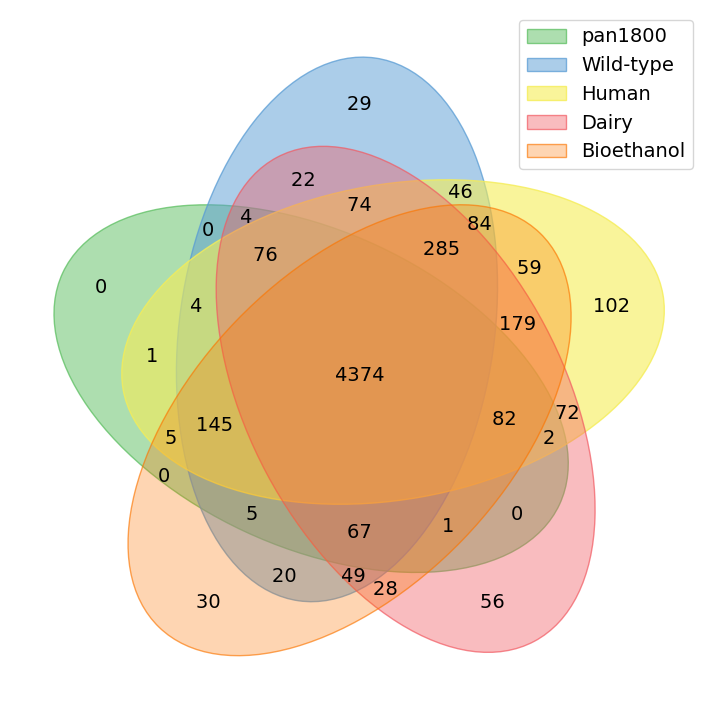

In [57]:
#load 1800 core gene list
df_core=pd.read_excel('result/pan1800_coregene.xlsx',index_col=0)
coreList=df_core[df_core['core99']==1].index.tolist()

import venn

labels = venn.get_labels([set(coreList),set(wt_coreList),set(human_coreList),set(dairy_coreList),set(bioethanol_coreList)], fill=['number', 
                                                                # 'logic',#开启每个组分代码
                                                                # 'percent'#每个组分的百分比
                                                               ],)

fig, ax = venn.venn5(labels, names=['pan1800','Wild-type', 'Human', 'Dairy','Bioethanol'])
fig.show()

In [59]:
coregene_dict={}
coregene_dict['Pan1800']=coreList
coregene_dict['Wild-type']=wt_coreList
coregene_dict['Human']=human_coreList
coregene_dict['Dairy']=dairy_coreList
coregene_dict['Bioethanol']=bioethanol_coreList

# save as json
import json
with open('code/7.human_diary_ethanol_analysis/output/coregene_List.json', 'w') as f:
    json.dump(coregene_dict, f)

In [6]:
# count the unqiue gene number in bioethanol & wt & biowthanol & dairy core
bioethanol_unique_core=list(set(bioethanol_coreList)-set(coreList))
wt_unique_core=list(set(wt_coreList)-set(coreList))
human_unique_core=list(set(human_coreList)-set(coreList))
dairy_unique_core=list(set(dairy_coreList)-set(coreList))

bioethano_no_wt=list(set(bioethanol_coreList)-set(wt_coreList))
human_no_wt=list(set(human_coreList)-set(wt_coreList))
dairy_no_wt=list(set(dairy_coreList)-set(wt_coreList))

print('bioethanol unique core: ',len(bioethanol_unique_core))
print('wt unique core: ',len(wt_unique_core))
print('human unique core: ',len(human_unique_core))
print('dairy unique core: ',len(dairy_unique_core))

print('bioethanol no wt: ',len(bioethano_no_wt))
print('human no wt: ',len(human_no_wt))
print('dairy no wt: ',len(dairy_no_wt))

bioethanol unique core:  734
wt unique core:  609
human unique core:  901
dairy unique core:  765
bioethanol no wt:  384
human no wt:  502
dairy no wt:  420


In [7]:
# compare the COG distribution differnece between bioethanol unique core & wt unique core
df_frequence=pd.DataFrame(df_functional_annot['COG_category'].value_counts()/(df_functional_annot['COG_category'].value_counts().sum()))
df_frequence['WT']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(wt_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(wt_unique_core),:]['COG_category'].value_counts().sum()))
df_frequence['Bioethanol']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(bioethanol_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(bioethanol_unique_core),:]['COG_category'].value_counts().sum()))
df_frequence['Human']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(human_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(human_unique_core),:]['COG_category'].value_counts().sum()))
df_frequence['Dairy']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(dairy_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(dairy_unique_core),:]['COG_category'].value_counts().sum()))
df_frequence=df_frequence.fillna(0)
df_frequence

,count,WT,Bioethanol,Human,Dairy
COG_category,,,,,
S,0.207756,0.231626,0.230179,0.241525,0.228571
U,0.105106,0.062361,0.061381,0.072034,0.051948
K,0.087033,0.120267,0.109974,0.103814,0.109091
J,0.067205,0.060134,0.066496,0.063559,0.062338
O,0.066503,0.062361,0.063939,0.061441,0.062338
...,...,...,...,...,...
EIJ,0.000175,0.000000,0.000000,0.000000,0.000000
ABO,0.000175,0.000000,0.000000,0.000000,0.000000
MW,0.000175,0.000000,0.000000,0.000000,0.000000


### Clustering bioethanol vs wildtype by geneMatrix/cnvMatrix

In [8]:
# combine bioethanol,wt,human,dairy geneMatrix/cnvMatrix
geneMatrix=pd.concat([bioethanol_geneMatrix,wt_geneMatrix,human_geneMatrix,dairy_geneMatrix],axis=1).T
cnvMatrix=pd.concat([bioethanol_cnvMatrix,wt_cnvMatrix,human_cnvMatrix,dairy_cnvMatrix],axis=1).T

# remove columns which sum is 0
geneMatrix=geneMatrix.loc[:,geneMatrix.sum(axis=0)>0]
cnvMatrix=cnvMatrix.loc[:,cnvMatrix.sum(axis=0)>0]

# add label
geneMatrix.loc[bioethanol_strainList,'Type']='Bioethanol'
geneMatrix.loc[wt_strainList,'Type']='Wild-type'
geneMatrix.loc[human_strainList,'Type']='Human'
geneMatrix.loc[dairy_strainList,'Type']='Dairy'

cnvMatrix.loc[bioethanol_strainList,'Type']='Bioethanol'
cnvMatrix.loc[wt_strainList,'Type']='Wild-type'
cnvMatrix.loc[human_strainList,'Type']='Human'
cnvMatrix.loc[dairy_strainList,'Type']='Dairy'

In [9]:
# PCA analysis for cnvMatrix and geneMatrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x1 = StandardScaler().fit_transform(geneMatrix.drop('Type',axis=1))
x2 = StandardScaler().fit_transform(cnvMatrix.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalComponents2 = pca2.fit_transform(x2)

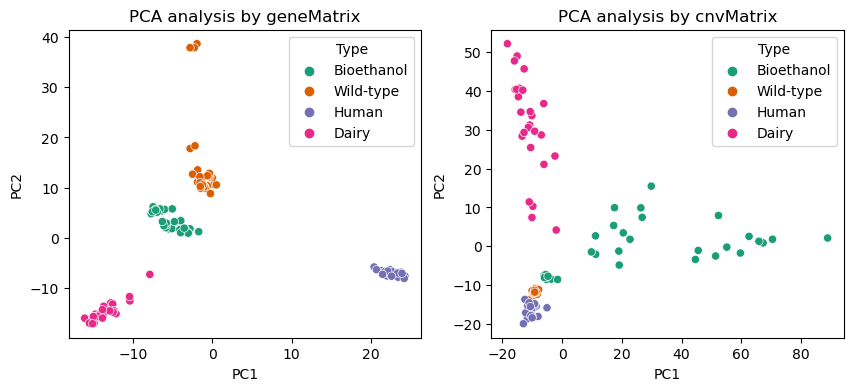

In [37]:
# plot
fig,axes=plt.subplots(1,2,figsize=(10,4))

# plot geneMatrix
pca_geneMatrix=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneMatrix['Type']=geneMatrix['Type'].values
sns.scatterplot(data=pca_geneMatrix,x='PC1',y='PC2',hue='Type',ax=axes[0],palette='Dark2')
axes[0].set_title('PCA analysis by geneMatrix')

# plot cnvMatrix
pca_cnvMatrix=pd.DataFrame(principalComponents2,columns=['PC1','PC2'])
pca_cnvMatrix['Type']=cnvMatrix['Type'].values
sns.scatterplot(data=pca_cnvMatrix,x='PC1',y='PC2',hue='Type',ax=axes[1],palette='Dark2')
axes[1].set_title('PCA analysis by cnvMatrix')

plt.show()

In [39]:
pca_geneMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_geneMatrix.csv')
pca_cnvMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_cnvMatrix.csv')

In [20]:
# extract the top important genes from PC1 variable
# geneMatrix
df_geneMatrix_pcafeature=pd.DataFrame(pca1.components_,columns=geneMatrix.drop('Type',axis=1).columns,index=['PC1','PC2'])
df_geneMatrix_pcafeature=df_geneMatrix_pcafeature.T
df_geneMatrix_pcafeature['PC1_abs']=df_geneMatrix_pcafeature['PC1'].abs()
df_geneMatrix_pcafeature=df_geneMatrix_pcafeature.sort_values(by='PC1_abs',ascending=False)

# cnvMatrix
df_cnvMatrix_pcafeature=pd.DataFrame(pca2.components_,columns=cnvMatrix.drop('Type',axis=1).columns,index=['PC1','PC2'])
df_cnvMatrix_pcafeature=df_cnvMatrix_pcafeature.T
df_cnvMatrix_pcafeature['PC2_abs']=df_cnvMatrix_pcafeature['PC2'].abs()
df_cnvMatrix_pcafeature=df_cnvMatrix_pcafeature.sort_values(by='PC2_abs',ascending=False)

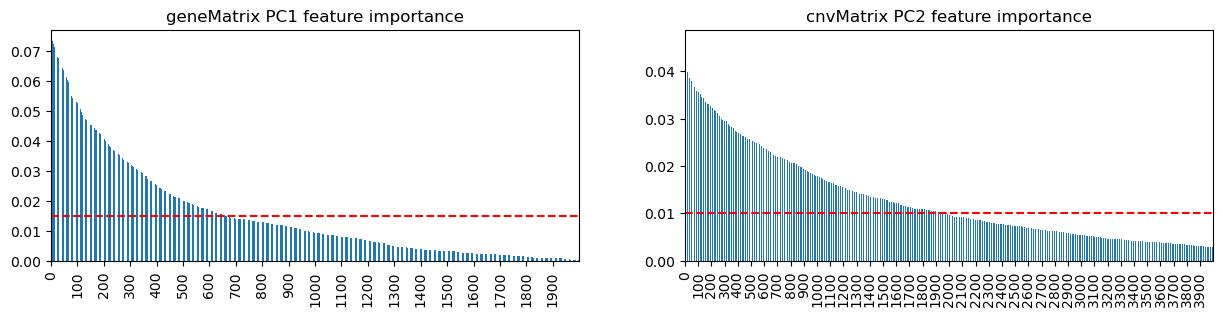

In [21]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
# plot geneMatrix
df_geneMatrix_pcafeature['PC1_abs'].head(2000).plot(kind='bar',ax=axes[0],xticks=range(0,2000,100),rot=90)
# set xticklabels as range(1,2000,100)
axes[0].set_title('geneMatrix PC1 feature importance')
# plot another dashed line 
axes[0].axhline(y=0.015,linestyle='--',color='r')

# plot cnvMatrix
df_cnvMatrix_pcafeature['PC2_abs'].head(4000).plot(kind='bar',ax=axes[1],xticks=range(0,4000,100),rot=90)
# set xticklabels as range(1,2000,100)
axes[1].set_title('cnvMatrix PC2 feature importance')
# plot another dashed line
axes[1].axhline(y=0.01,linestyle='--',color='r')

plt.show()

In [22]:
geneMatrix_important_geneList=df_geneMatrix_pcafeature.head(100).index.tolist()
cnvMatrix_important_geneList=df_cnvMatrix_pcafeature.head(100).index.tolist()

common_important_geneList=list(set(geneMatrix_important_geneList)&set(cnvMatrix_important_geneList))

print('common important gene number: ',len(common_important_geneList))

common important gene number:  5


In [23]:
top20_cnv_geneList = df_cnvMatrix_pcafeature.head(20).index.tolist()
df_top20_genecnv = pd.DataFrame(index=top20_cnv_geneList)
df_top20_genecnv['Bioethanol'] = df_top20_genecnv.index.map(lambda x: cnvMatrix[cnvMatrix['Type'] == 'Bioethanol'][x].mean())
df_top20_genecnv['Wild-type'] = df_top20_genecnv.index.map(lambda x: cnvMatrix[cnvMatrix['Type'] == 'Wild-type'][x].mean())
df_top20_genecnv['Human'] = df_top20_genecnv.index.map(lambda x: cnvMatrix[cnvMatrix['Type'] == 'Human'][x].mean())
df_top20_genecnv['Dairy'] = df_top20_genecnv.index.map(lambda x: cnvMatrix[cnvMatrix['Type'] == 'Dairy'][x].mean())
df_top20_genecnv.head()

,Bioethanol,Wild-type,Human,Dairy
YIL156W-A,1.00000,1.00000,1.0,0.038462
scepan0793,0.06250,0.00000,0.0,1.807692
YKR104W,0.96875,1.00000,1.0,0.038462
YDR344C,1.00000,0.96875,1.0,0.000000
YOR309C,1.00000,1.00000,1.0,0.153846


In [24]:
top20_geneMatrix_geneList = df_geneMatrix_pcafeature.head(20).index.tolist()
df_top20_geneMatrix = pd.DataFrame(index=top20_geneMatrix_geneList)
df_top20_geneMatrix['Bioethanol'] = df_top20_geneMatrix.index.map(lambda x: geneMatrix[geneMatrix['Type'] == 'Bioethanol'][x].mean())
df_top20_geneMatrix['Wild-type'] = df_top20_geneMatrix.index.map(lambda x: geneMatrix[geneMatrix['Type'] == 'Wild-type'][x].mean())
df_top20_geneMatrix['Human'] = df_top20_geneMatrix.index.map(lambda x: geneMatrix[geneMatrix['Type'] == 'Human'][x].mean())
df_top20_geneMatrix['Dairy'] = df_top20_geneMatrix.index.map(lambda x: geneMatrix[geneMatrix['Type'] == 'Dairy'][x].mean())
df_top20_geneMatrix.head()

,Bioethanol,Wild-type,Human,Dairy
YDR246W-A,1.0,1.0,0.0,1.0
YOL085W-A,1.0,1.0,0.0,1.0
YNL170W,1.0,1.0,0.0,1.0
scepan1077,0.0,0.0,1.0,0.0
YLR357W,1.0,1.0,0.0,1.0


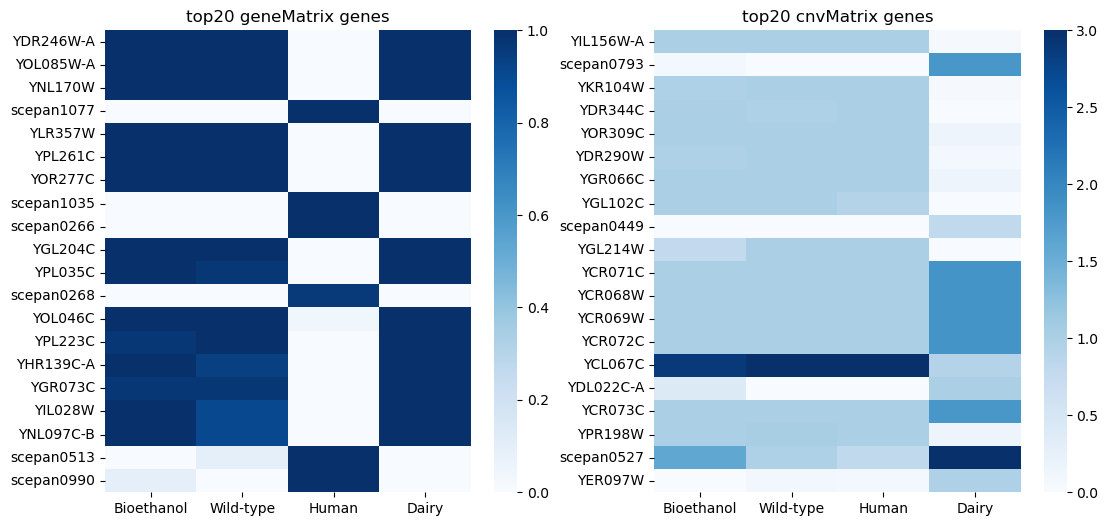

In [25]:
# plot heatmap for top20 geneMatrix/cnvMatrix genes
fig,axes=plt.subplots(1,2,figsize=(13,6))
sns.heatmap(df_top20_geneMatrix,ax=axes[0],cmap='Blues')
axes[0].set_title('top20 geneMatrix genes')
sns.heatmap(df_top20_genecnv,ax=axes[1],cmap='Blues',vmax=3)
axes[1].set_title('top20 cnvMatrix genes')
plt.show()

### accessory genes clustering analysis

In [13]:
# coregeneList
coreList
coregeneMatrix=geneMatrix[coreList+['Type']] # core geneMatrix
corecnvMatrix=cnvMatrix[coreList+['Type']] # core cnvMatrix
# # accessory geneList
accessoryList=list(set(geneMatrix.columns.tolist())-set(coreList))
access_geneMatrix=geneMatrix[accessoryList] # accessory geneMatrix
access_cnvMatrix=cnvMatrix[accessoryList] # accessory cnvMatrix

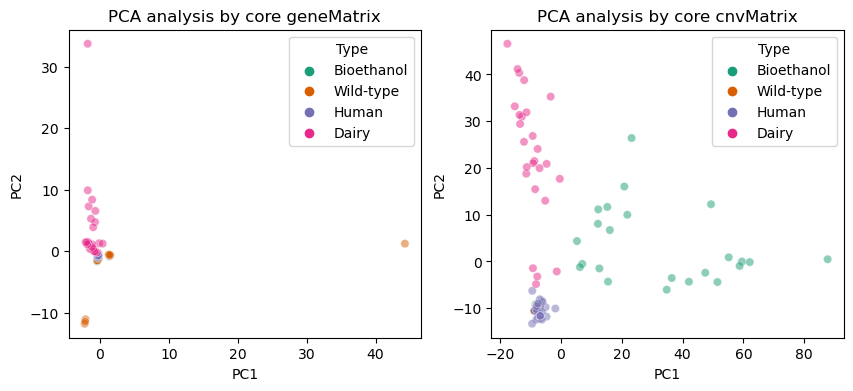

In [41]:
# PCA analysis for core geneMatrix/cnvMatrix
# Standardize the data
x1 = StandardScaler().fit_transform(coregeneMatrix.drop('Type',axis=1))
x2 = StandardScaler().fit_transform(corecnvMatrix.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalComponents2 = pca2.fit_transform(x2)

# # plot
fig,axes=plt.subplots(1,2,figsize=(10,4))

# # plot geneMatrix
pca_geneMatrix=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneMatrix['Type']=coregeneMatrix['Type'].values
sns.scatterplot(data=pca_geneMatrix,x='PC1',y='PC2',hue='Type',ax=axes[0],palette='Dark2',alpha=0.5)
axes[0].set_title('PCA analysis by core geneMatrix')

# plot cnvMatrix
pca_cnvMatrix=pd.DataFrame(principalComponents2,columns=['PC1','PC2'])
pca_cnvMatrix['Type']=corecnvMatrix['Type'].values
sns.scatterplot(data=pca_cnvMatrix,x='PC1',y='PC2',hue='Type',ax=axes[1],palette='Dark2',alpha=0.5)
axes[1].set_title('PCA analysis by core cnvMatrix')

plt.show()

In [42]:
pca_geneMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_coregeneMatrix.csv')
pca_cnvMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_corecnvMatrix.csv')

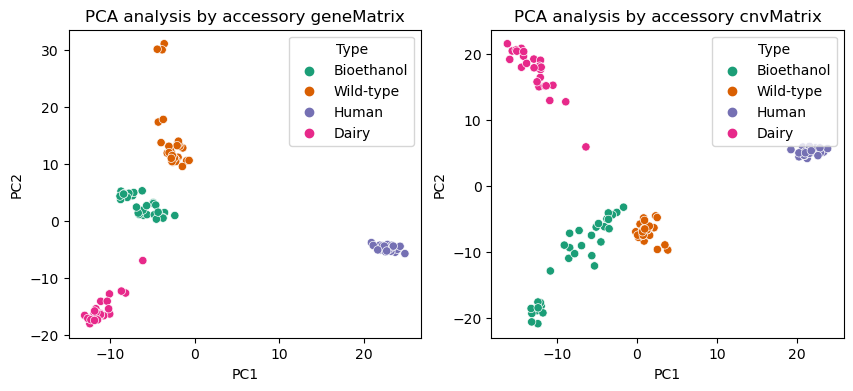

In [43]:
# PCA analysis for accessory geneMatrix/cnvMatrix
# PCA analysis for cnvMatrix and geneMatrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x1 = StandardScaler().fit_transform(access_geneMatrix.drop('Type',axis=1))
x2 = StandardScaler().fit_transform(access_cnvMatrix.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalComponents2 = pca2.fit_transform(x2)

# # plot
fig,axes=plt.subplots(1,2,figsize=(10,4))

# # plot geneMatrix
pca_geneMatrix=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneMatrix['Type']=access_geneMatrix['Type'].values
sns.scatterplot(data=pca_geneMatrix,x='PC1',y='PC2',hue='Type',ax=axes[0],palette='Dark2')
axes[0].set_title('PCA analysis by accessory geneMatrix')

# plot cnvMatrix
pca_cnvMatrix=pd.DataFrame(principalComponents2,columns=['PC1','PC2'])
pca_cnvMatrix['Type']=access_cnvMatrix['Type'].values
sns.scatterplot(data=pca_cnvMatrix,x='PC1',y='PC2',hue='Type',ax=axes[1],palette='Dark2')
axes[1].set_title('PCA analysis by accessory cnvMatrix')

plt.show()

In [44]:
pca_geneMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_accessorygeneMatrix.csv')
pca_cnvMatrix.to_csv('code/7.human_diary_ethanol_analysis/output/pca_accessorycnvMatrix.csv')

### Random ForestClassifier model capture potential genetic signiture

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def random_forest():
    parameters = {
                    'max_features':['sqrt','log2'],'n_estimators':[10,100,500,1000]
    }
    rf = RandomForestClassifier()
    model=GridSearchCV(rf,parameters,n_jobs=1,cv=5)      #optimize the parameters
    return model

def do_cross_validation(X,y,model):
    '''do cross validation to evaluate the model'''
    scores = cross_val_score(model,X,y,scoring='accuracy',cv=5,n_jobs=1)
    print('mean score:',np.mean(scores),'std:',np.std(scores))
    return str(np.mean(scores))+','+str(np.std(scores))+'\n'

def extract_feature_importance(model,X):
    '''extract feature importance from model'''
    feature_importance = model.best_estimator_.feature_importances_
    feature_importance = pd.DataFrame(feature_importance,index=access_geneMatrix.drop(columns=["Type"]).columns,columns=["importance"])
    feature_importance.sort_values(by="importance",ascending=False,inplace=True)
    feature_importance=feature_importance["importance"]
    
    return feature_importance

def run_random_forest(data):
    y=list(data["Type"])
    x=data.drop(columns=["Type"])
    model=random_forest()
    model.fit(x,y)
    score=do_cross_validation(x,y,model)
    feature_importance=extract_feature_importance(model,x)
    return score,feature_importance


In [46]:
# run random forest for Human and wildtype accessory geneMatrix and cnvMatrix
human_wt_geneMatrix=access_geneMatrix[access_geneMatrix['Type'].isin(['Human','Wild-type'])]
human_wt_cnvMatrix=access_cnvMatrix[access_cnvMatrix['Type'].isin(['Human','Wild-type'])]
diary_wt_geneMatrix=access_geneMatrix[access_geneMatrix['Type'].isin(['Dairy','Wild-type'])]
diary_wt_cnvMatrix=access_cnvMatrix[access_cnvMatrix['Type'].isin(['Dairy','Wild-type'])]
bioethanol_wt_geneMatrix=access_geneMatrix[access_geneMatrix['Type'].isin(['Bioethanol','Wild-type'])]
bioethanol_wt_cnvMatrix=access_cnvMatrix[access_cnvMatrix['Type'].isin(['Bioethanol','Wild-type'])]

score_geneMatrix_human_wt,feature_importance_geneMatrix_human_wt=run_random_forest(human_wt_geneMatrix)
score_cnvMatrix_human_wt,feature_importance_cnvMatrix_human_wt=run_random_forest(human_wt_cnvMatrix)
score_geneMatrix_diary_wt,feature_importance_geneMatrix_diary_wt=run_random_forest(diary_wt_geneMatrix)
score_cnvMatrix_diary_wt,feature_importance_cnvMatrix_diary_wt=run_random_forest(diary_wt_cnvMatrix)
score_geneMatrix_bioethanol_wt,feature_importance_geneMatrix_bioethanol_wt=run_random_forest(bioethanol_wt_geneMatrix)
score_cnvMatrix_bioethanol_wt,feature_importance_cnvMatrix_bioethanol_wt=run_random_forest(bioethanol_wt_cnvMatrix)

mean score: 0.9666666666666668 std: 0.06666666666666667
mean score: 1.0 std: 0.0
mean score: 1.0 std: 0.0
mean score: 1.0 std: 0.0
mean score: 0.9833333333333334 std: 0.03333333333333335
mean score: 1.0 std: 0.0


In [10]:
# # save all geneMatrix feature in 1 excel file
# with pd.ExcelWriter(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx') as writer:
#     feature_importance_geneMatrix_human_wt.to_excel(writer,sheet_name='human')
#     feature_importance_cnvMatrix_human_wt.to_excel(writer,sheet_name='human_cnv')
#     feature_importance_geneMatrix_diary_wt.to_excel(writer,sheet_name='dairy')
#     feature_importance_cnvMatrix_diary_wt.to_excel(writer,sheet_name='dairy_cnv')
#     feature_importance_geneMatrix_bioethanol_wt.to_excel(writer,sheet_name='bioethanol')
#     feature_importance_cnvMatrix_bioethanol_wt.to_excel(writer,sheet_name='bioethanol_cnv')

# load the feature importance
feature_importance_geneMatrix_human_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='human',index_col=0)
feature_importance_cnvMatrix_human_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='human_cnv',index_col=0)
feature_importance_geneMatrix_diary_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='dairy',index_col=0)
feature_importance_cnvMatrix_diary_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='dairy_cnv',index_col=0)
feature_importance_geneMatrix_bioethanol_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='bioethanol',index_col=0)
feature_importance_cnvMatrix_bioethanol_wt=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/accessorygenome_feature_importance.xlsx',sheet_name='bioethanol_cnv',index_col=0)

In [14]:
feature_genelist_combined=feature_importance_geneMatrix_human_wt.head(10).index.tolist()+feature_importance_geneMatrix_diary_wt.head(10).index.tolist()+feature_importance_geneMatrix_bioethanol_wt.head(10).index.tolist()
feature_cnv_genelist_combined=feature_importance_cnvMatrix_human_wt.head(10).index.tolist()+feature_importance_cnvMatrix_diary_wt.head(10).index.tolist()+feature_importance_cnvMatrix_bioethanol_wt.head(10).index.tolist()
feature_genelist_combined=list(set(feature_genelist_combined))
feature_cnv_genelist_combined=list(set(feature_cnv_genelist_combined))
feature_geneMatrix=access_geneMatrix[feature_genelist_combined+['Type']]
feature_cnvMatrix=access_cnvMatrix[feature_cnv_genelist_combined+['Type']]

df_geneMatrix_feature = pd.DataFrame(index=feature_genelist_combined)
df_cnvMatrix_feature = pd.DataFrame(index=feature_cnv_genelist_combined)
df_geneMatrix_feature['Human'] = df_geneMatrix_feature.index.map(lambda x: feature_geneMatrix[feature_geneMatrix['Type'] == 'Human'][x].mean())
df_geneMatrix_feature['Dairy'] = df_geneMatrix_feature.index.map(lambda x: feature_geneMatrix[feature_geneMatrix['Type'] == 'Dairy'][x].mean())
df_geneMatrix_feature['Bioethanol'] = df_geneMatrix_feature.index.map(lambda x: feature_geneMatrix[feature_geneMatrix['Type'] == 'Bioethanol'][x].mean())
df_geneMatrix_feature['Wild-type']=df_geneMatrix_feature.index.map(lambda x: feature_geneMatrix[feature_geneMatrix['Type'] == 'Wild-type'][x].mean())
df_cnvMatrix_feature['Human'] = df_cnvMatrix_feature.index.map(lambda x: feature_cnvMatrix[feature_cnvMatrix['Type'] == 'Human'][x].mean())
df_cnvMatrix_feature['Dairy'] = df_cnvMatrix_feature.index.map(lambda x: feature_cnvMatrix[feature_cnvMatrix['Type'] == 'Dairy'][x].mean())
df_cnvMatrix_feature['Bioethanol'] = df_cnvMatrix_feature.index.map(lambda x: feature_cnvMatrix[feature_cnvMatrix['Type'] == 'Bioethanol'][x].mean())
df_cnvMatrix_feature['Wild-type']=df_cnvMatrix_feature.index.map(lambda x: feature_cnvMatrix[feature_cnvMatrix['Type'] == 'Wild-type'][x].mean())  

# set > 0.5 as 1, <=0.5 as 0 for geneMatrix
df_geneMatrix_feature[df_geneMatrix_feature>0.5]=1
df_geneMatrix_feature[df_geneMatrix_feature<=0.5]=0

# reset the columns order
df_geneMatrix_feature=df_geneMatrix_feature[['Wild-type','Human','Dairy','Bioethanol']]
df_cnvMatrix_feature=df_cnvMatrix_feature[['Wild-type','Human','Dairy','Bioethanol']]

In [16]:
# save the feature importance
df_geneMatrix_feature.to_csv('code/7.human_diary_ethanol_analysis/output/accessorygeneMatrix_feature_importance.csv')
df_cnvMatrix_feature.to_csv('code/7.human_diary_ethanol_analysis/output/accessorycnvMatrix_feature_importance.csv')

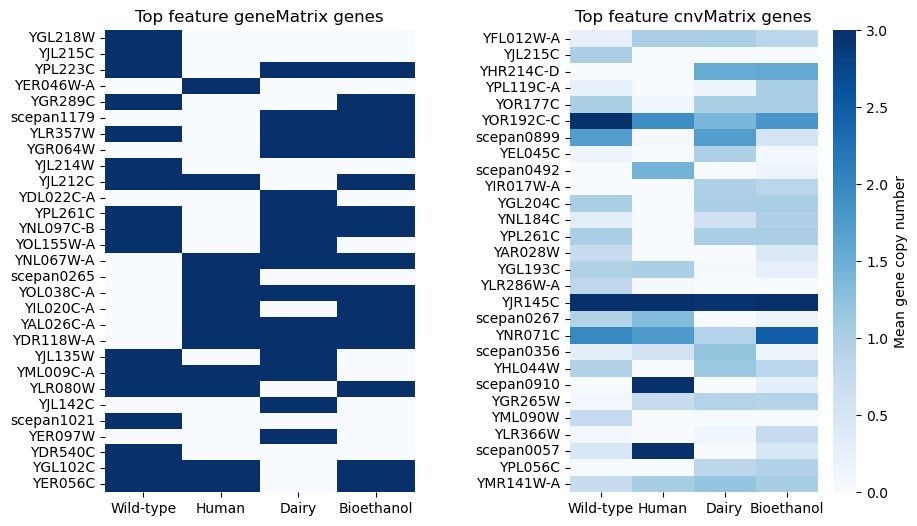

In [19]:
# plot heatmap for df_geneMatrix_feature, df_cnvMatrix_feature by seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# plot heatmap for top feature for geneMatrix/cnvMatrix, set the size for subplots as 2:3
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.heatmap(df_geneMatrix_feature,ax=axes[0],cmap='Blues')
axes[0].set_title('Top feature geneMatrix genes')
# remove color bar
axes[0].collections[0].colorbar.remove()

sns.heatmap(df_cnvMatrix_feature,ax=axes[1],cmap='Blues',vmax=3)
axes[1].set_title('Top feature cnvMatrix genes')
# set color bar 
axes[1].collections[0].colorbar.set_label('Mean gene copy number')
# how to shrink the color bar
cbar = axes[1].collections[0].colorbar

# set distance between two heatmap, and set the size as 2:3
plt.subplots_adjust(wspace=0.5)

plt.show()

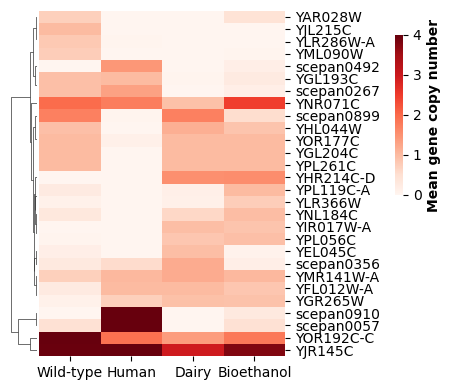

In [29]:
ax=sns.clustermap(data=df_cnvMatrix_feature,
               figsize=(4,4),
               vmin=0,
               vmax=4,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.1,0),
               col_cluster=False
               )
# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('Mean gene copy number',weight='bold')
# set location of colorbar
cbar.set_position([1, .5, .02, .4])
# set xticklabels
# ax.ax_heatmap.set_xticklabels(['Slow','Moderate','Rapid'])
plt.show()

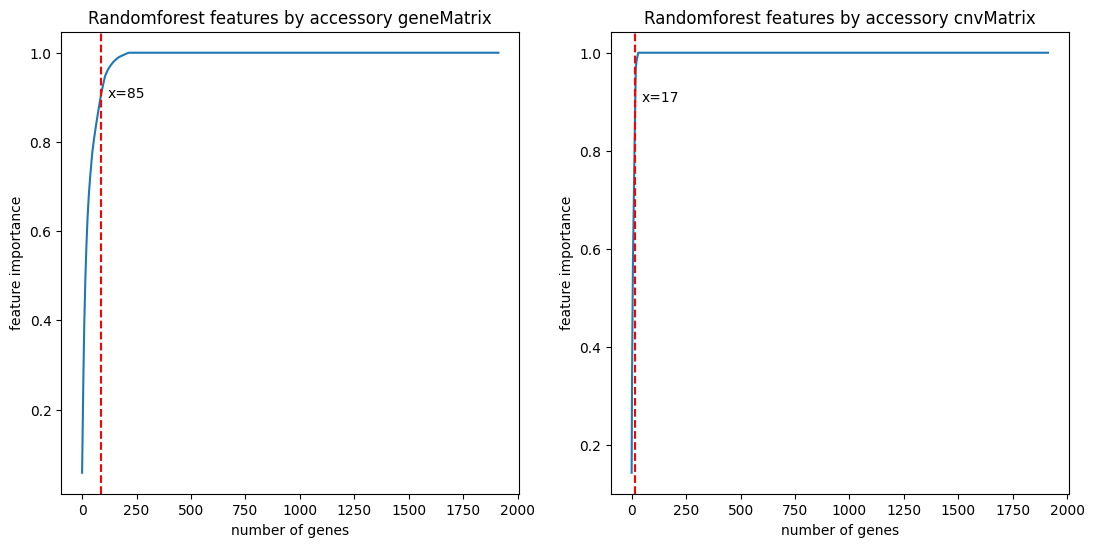

In [60]:
# plot 积累曲线 for feature_importance,feature_importance2,each value is the sum of the previous value,
fig,axes=plt.subplots(1,2,figsize=(13,6))
axes[0].plot(np.arange(len(feature_importance)),feature_importance.cumsum())
# check the point where the sum of the previous value is 0.9, show the x-axis value
cutoff=0.9
axes[0].axvline(x=np.argwhere(feature_importance.cumsum()>cutoff)[0][0],linestyle='--',color='r')
axes[0].text(np.argwhere(feature_importance.cumsum()>cutoff)[0][0]+30,cutoff,'x='+str(np.argwhere(feature_importance.cumsum()>cutoff)[0][0]))
axes[0].set_title('Randomforest features by accessory geneMatrix')
# x-axis is the number of genes
axes[0].set_xlabel('number of genes')
axes[0].set_ylabel('feature importance')
axes[1].plot(np.arange(len(feature_importance2)),feature_importance2.cumsum())
# check the point where the sum of the previous value is 0.9, show the x-axis value
axes[1].axvline(x=np.argwhere(feature_importance2.cumsum()>cutoff)[0][0],linestyle='--',color='r')
axes[1].text(np.argwhere(feature_importance2.cumsum()>cutoff)[0][0]+30,cutoff,'x='+str(np.argwhere(feature_importance2.cumsum()>cutoff)[0][0]))
axes[1].set_title('Randomforest features by accessory cnvMatrix')
# x-axis is the number of genes
axes[1].set_xlabel('number of genes')
axes[1].set_ylabel('feature importance')
plt.show()